In [5]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree 예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#로지스틱 회귀분석
from statsmodels.api import Logit

# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#XG BOOST
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance


#평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [6]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/통신고객이탈.csv", engine = "python", encoding="CP949")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [7]:
df_raw.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [8]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [9]:
df_raw["CHURN"] = np.where(df_raw['CHURN'] == "Churned",1,0)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [10]:
df_raw["CHURN"].sum()

180

In [11]:
df_raw = df_raw.drop("CUSTOMER_ID", axis = 1, inplace =False)

In [12]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,HANDSET_CAS60,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [13]:
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace =False)
df_raw_y = df_raw_dummy["CHURN"]

In [14]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [15]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}\n".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.971

Accuracy on test set: 0.885



In [16]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [17]:
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range (1,10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy


df_accuracy_lr["D"] = df_accuracy_lr["TrainAccuracy"]-df_accuracy_lr["TestAccuracy"]

df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy,D
0,0.1,0.971,0.885,0.086
1,0.2,0.998,0.885,0.113
2,0.3,1.000,0.892,0.108
3,0.4,1.000,0.860,0.140
4,0.5,1.000,0.878,0.122
5,0.6,1.000,0.882,0.118
6,0.7,1.000,0.875,0.125
7,0.8,1.000,0.885,0.115
8,0.9,1.000,0.853,0.147


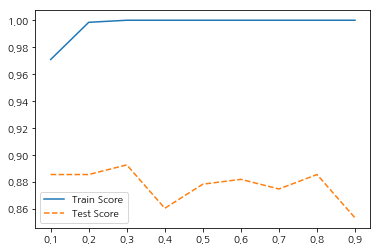

In [18]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [19]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range (1,16)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.3, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy


df_accuracy_n["D"] = df_accuracy_n["TrainAccuracy"]-df_accuracy_n["TestAccuracy"]

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,D
0,10,0.942,0.885,0.056
1,20,0.965,0.896,0.069
2,30,0.972,0.892,0.080
3,40,0.988,0.892,0.095
4,50,0.992,0.892,0.100
5,60,0.997,0.892,0.104
6,70,0.998,0.892,0.106
7,80,1.000,0.889,0.111
8,90,1.000,0.892,0.108
9,100,1.000,0.889,0.111


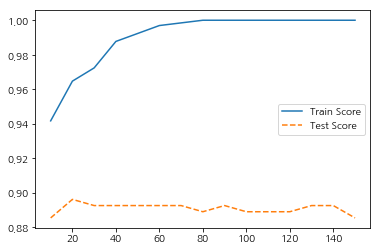

In [20]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [21]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, learning_rate=0.3, n_estimators=20, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


df_accuracy_depth["D"] = df_accuracy_depth["TrainAccuracy"]-df_accuracy_depth["TestAccuracy"]

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,D
0,1,0.876,0.910,-0.035
1,2,0.922,0.910,0.011
2,3,0.965,0.896,0.069
3,4,0.986,0.885,0.101
4,5,1.000,0.885,0.115
5,6,1.000,0.885,0.115
6,7,1.000,0.882,0.118
7,8,1.000,0.892,0.108
8,9,1.000,0.878,0.122
9,10,1.000,0.903,0.097


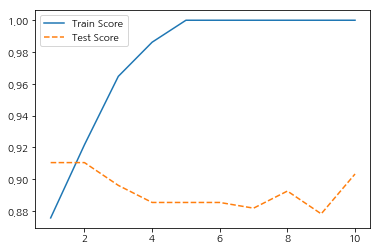

In [22]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [23]:
v_feature_name = df_train_x.columns

In [24]:
train_accuracy = []; test_accuracy = []

para_split = [n_split *10 for n_split in range (2,11)]

for v_min_samples_split in para_split :
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, learning_rate=0.3, max_depth = 2, n_estimators=20, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy


df_accuracy_split["D"] = df_accuracy_split["TrainAccuracy"]-df_accuracy_split["TestAccuracy"]

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy,D
0,20,0.917,0.914,0.003
1,30,0.916,0.910,0.005
2,40,0.916,0.910,0.005
3,50,0.916,0.921,-0.006
4,60,0.916,0.903,0.012
5,70,0.916,0.903,0.012
6,80,0.916,0.903,0.012
7,90,0.912,0.910,0.002
8,100,0.912,0.910,0.002


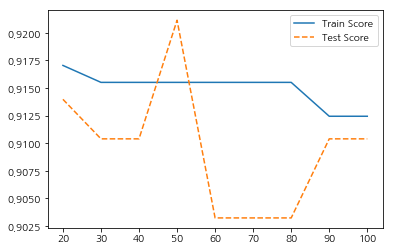

In [25]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [26]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf *10 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, learning_rate=0.3, max_depth = 2, n_estimators=20, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


df_accuracy_leaf["D"] = df_accuracy_leaf["TrainAccuracy"]-df_accuracy_leaf["TestAccuracy"]

df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy,D
0,10,0.909,0.907,0.003
1,20,0.905,0.914,-0.009
2,30,0.888,0.882,0.006
3,40,0.891,0.885,0.006
4,50,0.834,0.842,-0.008
5,60,0.833,0.860,-0.028
6,70,0.816,0.835,-0.019
7,80,0.813,0.817,-0.005
8,90,0.806,0.828,-0.022
9,100,0.806,0.835,-0.029


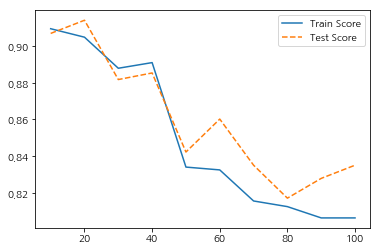

In [27]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [28]:
gb_final = GradientBoostingClassifier(random_state = 1234, max_depth=2, min_samples_leaf=20, n_estimators = 20, learning_rate=0.3)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [29]:
y_pred = gb_final.predict(df_test_x)

print("Accuracy on training set: {0:.3f}\n".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.905

Accuracy on test set: 0.914

Confusion Matrix: 
[[226   9]
 [ 15  29]]


In [30]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.344
2,DROPPED_CALLS,0.223
20,HANDSET_CAS30,0.136
4,PEAK_CALLS_TIME,0.093
8,TOTAL_CALLS_TIME,0.069
1,SERVICE_DURATION,0.061
14,CHARGE_TYPE_Play 100,0.016
26,HANDSET_WC95,0.013
0,AGE,0.011
16,HANDSET_ASAD170,0.010


Text(0, 0.5, '변수')

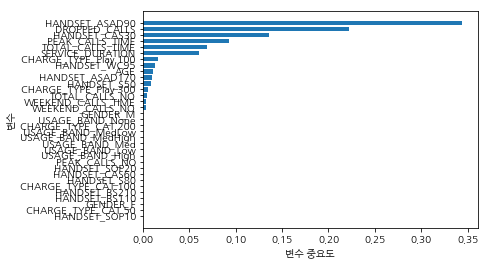

In [39]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [40]:
estimator = GradientBoostingClassifier()

param_grid = {"learning_rate":para_lr, "max_depth":para_depth, "min_samples_leaf":para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

best parameter: 
{'learning_rate': 0.2, 'max_depth': 1, 'min_samples_leaf': 10}

best score:
0.891


In [3]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

dataset = pd.read_csv("/home/pirl/Statistics/Day3_0715/통신고객이탈.csv", engine = "python", encoding="CP949")
dataset.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


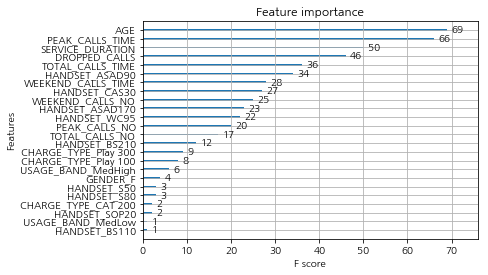

In [33]:
model = XGBClassifier()
model.fit(df_train_x, df_train_y)

plot_importance(model)
mpl.pyplot.show()

In [35]:
y_pred = model.predict(df_test_x)

print("Accuracy on training set: {0:.3f}\n".format(model.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(model.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.951

Accuracy on test set: 0.889

Confusion Matrix: 
[[221  14]
 [ 17  27]]
